In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df.shape

(299, 13)

In [14]:
df.head(10)
#df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
#dividing the dataset into train and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2,random_state= 1)

In [8]:
print(train.shape)
print(test.shape)


(239, 13)
(60, 13)


In [9]:
x_train = train.drop(['DEATH_EVENT'], 1)
x_test = test.drop(['DEATH_EVENT'], 1)

y_train = train['DEATH_EVENT']
y_test=test['DEATH_EVENT']

In [10]:
#model fitting
from sklearn.linear_model import LogisticRegression

#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


train accuracy: 0.803347280334728 
 test accuracy: 0.8833333333333333


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.71      0.77      0.74        13

    accuracy                           0.88        60
   macro avg       0.82      0.84      0.83        60
weighted avg       0.89      0.88      0.88        60



confusion matrix for logistic regression


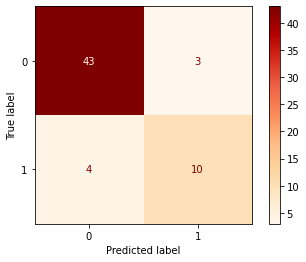

In [11]:
#logistic regression
lr = LogisticRegression(max_iter=20000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)

print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, x_test, y_test,cmap=plt.cm.OrRd , values_format='d')

In [12]:
import pickle

# save the model to disk
filename = 'lrmodel.sav'
pickle.dump(lr, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [13]:
# test prediction on patient input

patient_dict = {'age': 60.0, 'anaemia': 0.0, 'creatinine_phosphokinase': 235.0, 'diabetes': 1.0, 'ejection_fraction': 38.0, 'high_blood_pressure': 0.0,
                'platelets': 329000.0, 'serum_creatinine': 3.0, 'serum_sodium': 142.0, 'sex': 0.0, 'smoking': 0.0, 'time': 30.0}

patient_df = pd.DataFrame([patient_dict])


patient_pred = lr.predict(patient_df)
print("probability: ", lr.predict_proba(patient_df)[:,1])
print(patient_pred)

probability:  [0.88323659]
[1]
